## Importar Datos

In [1]:
# Importar datos de Produccion de Crudo de 2018 a 2020
# Asume que los archivos son datos de produccion por meses 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df_2020 = pd.read_excel('Datos\Producción Fiscalizada Crudo 2020 Agosto.xlsx')
df_2019 = pd.read_excel('Datos\Producción Fiscalizada Crudo 2019-DIC.xlsx')
df_2018 = pd.read_excel('Datos\Producción Fiscalizada Crudo 2018.xlsx')

In [2]:
# Nombres de columnas estan mal (se puede borrar)
df_2020.columns.values

array(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'], dtype=object)

In [3]:
# Funcion para limpieza del archivo excel y poner en formato
def format_excel(df_excel_raw, year = 2020):
    df_excel_raw.dropna(inplace = True) #eliminar filas NO validas
    df_excel_raw.rename(columns=df_excel_raw.iloc[0],inplace = True) #reemplazar el nombre de las columnas
    df_excel_raw.drop(df_excel_raw.index[0], inplace = True)
    df_excel_raw.reset_index(drop = True, inplace = True) # reiniciar el indexado de las filas
    
    # llenar datos nulos para meses faltantes (si no tiene datos de produccion para cada mes)
    df_excel_raw.columns = df_excel_raw.columns.str.strip().str.lower() # convertir nombre de columnas a minusculas y sin espacios
    meses = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
    
    for mes in meses:
        if (0 in np.core.defchararray.find( df_excel_raw.columns.values.astype(str), mes)):
            # reemplazar nombre de Mes a nombre corto (Enero --> ene)
            df_excel_raw.columns.values[[i for i,item in enumerate(df_excel_raw.columns.values) if mes in item]] = mes            
            
        else:
            # Si no hay datos para el mes, anadir una columna de ceros para ese mes
            df_excel_raw[mes] = pd.Series([0 for x in range(len(df_excel_raw.index))], index=df_excel_raw.index)
    
    # anadir columna con anho
    df_excel_raw['año'] = pd.Series([year for x in range(len(df_excel_raw.index))], index=df_excel_raw.index)
    return df_excel_raw

In [4]:
format_excel(df_2020,2020)
format_excel(df_2019,2019)
format_excel(df_2018,2018)
df_2020.head(5) #mostrar produccion de crudo - 2020

,departamento,municipio,operadora,contrato,campo,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año
0,ANTIOQUIA,PUERTO NARE,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,1765.84,1689.32,1826.93,1537.57,1238.72,1049.21,975.58,949,0,0,0,0,2020
1,ANTIOQUIA,PUERTO TRIUNFO,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,119.7,118.32,81.96,0,0,0,14.05,104.08,0,0,0,0,2020
2,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO,CASABE,11636.6,11584.2,11488.2,10711.5,9483.4,9402.73,9599.38,9527.73,0,0,0,0,2020
3,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO,CASABE SUR,1852.6,1763.47,1831.5,1838.38,1539.16,1541.67,1573.16,1514.94,0,0,0,0,2020
4,ANTIOQUIA,PUERTO NARE,MANSAROVAR ENERGY COLOMBIA LTD,NARE,NARE SUR,187.33,184.97,173.58,191.32,193.94,166.74,168.84,152.02,0,0,0,0,2020


In [5]:
# Unir produccion desde 2018 a 2020 en Un unico DF
df_2018_2020 = pd.concat([df_2020, df_2019, df_2018], ignore_index = True)

In [6]:
# Mostrar produccion de 2018 a 2020
df_2018_2020.head()

,departamento,municipio,operadora,contrato,campo,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año
0,ANTIOQUIA,PUERTO NARE,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,1765.84,1689.32,1826.93,1537.57,1238.72,1049.21,975.58,949,0,0,0,0,2020
1,ANTIOQUIA,PUERTO TRIUNFO,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,119.7,118.32,81.96,0,0,0,14.05,104.08,0,0,0,0,2020
2,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO,CASABE,11636.6,11584.2,11488.2,10711.5,9483.4,9402.73,9599.38,9527.73,0,0,0,0,2020
3,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO,CASABE SUR,1852.6,1763.47,1831.5,1838.38,1539.16,1541.67,1573.16,1514.94,0,0,0,0,2020
4,ANTIOQUIA,PUERTO NARE,MANSAROVAR ENERGY COLOMBIA LTD,NARE,NARE SUR,187.33,184.97,173.58,191.32,193.94,166.74,168.84,152.02,0,0,0,0,2020


In [7]:
# Exportar a .xlsx - produccion 2018 a 2020
df_2018_2020.to_excel('Datos\Producción Fiscalizada Crudo 2018 - 2020.xlsx', index = False)

## Lectura de archivo: Producción de Crudo de 2018 a 2020

In [8]:
df_2018_2020 = pd.read_excel('Datos\Producción Fiscalizada Crudo 2018 - 2020.xlsx')

In [9]:
# Convertir datos de produccion por meses a float y sumarlos para tener produccion total en el anho
df_2018_2020['total'] = 0
for mes in ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']:
    df_2018_2020[mes] = pd.to_numeric(df_2018_2020[mes])
    df_2018_2020['total'] +=df_2018_2020[mes]

In [10]:
# produccion de 2018 a 2020
df_2018_2020.tail()

,departamento,municipio,operadora,contrato,campo,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año,total
1333,TOLIMA,PURIFICACIÓN,HOCOL S.A.,CHENCHE,CHENCHE,49.000000,48.142857,47.225806,47.066667,46.108065,45.213000,44.992581,45.084194,38.536667,38.620000,47.002333,47.537742,2018,544.529911
1334,TOLIMA,PURIFICACIÓN,HOCOL S.A.,ESPINAL,MATACHÍN NORTE,1715.709677,1676.428571,1667.064516,1528.733333,1406.483871,1318.685667,1184.354839,1311.347097,1427.122000,1616.300000,1545.175000,1620.640000,2018,18018.044571
1335,TOLIMA,PURIFICACIÓN,HOCOL S.A.,ESPINAL,MATACHÍN SUR,219.612903,220.000000,238.129032,215.166667,215.580645,197.589333,188.106452,171.372258,167.229333,159.028710,135.403000,107.890645,2018,2235.108978
1336,TOLIMA,PURIFICACIÓN,HOCOL S.A.,ESPINAL,PURIFICACIÓN,504.741935,392.892857,337.258065,299.500000,267.741935,237.800000,221.133548,220.360000,207.913667,202.744516,195.346667,194.820000,2018,3282.253190
1337,TOLIMA,SAN LUIS,HOCOL S.A.,ORTEGA,PACANDE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.551935,2018,78.551935


## Pregunta 1

In [11]:
# Ordenar por Campo 
df_2018_2020.groupby(['campo','año']).sum()

ene          feb          mar          abr  \
campo    año                                                        
ABANICO  2018   569.387097   586.392857   587.967742   605.766667   
         2019   503.190000   476.820000   456.230000   424.830000   
         2020   507.720000   482.580000   486.560000   472.800000   
ABARCO   2018  3408.318387  3669.928214  3629.268387  4212.234667   
         2019  3515.050000  3387.580000  3140.820000  3201.840000   
...                    ...          ...          ...          ...   
ZOE      2019     0.000000     4.620000     3.750000     0.000000   
         2020     3.270000     2.610000     0.000000     0.000000   
ZOPILOTE 2018  1387.110000  1348.007143  1339.120645  1459.255000   
         2019  1448.730000  1365.180000  1206.410000  1141.820000   
         2020  1244.110000  1260.110000  1211.950000   825.560000   

                       may          jun          jul          ago  \
campo    año                                                        
ABANICO  2018   633.870968   709.466667   678.967742   649.129032   
         2019   469.350000   460.900000   469.610000   477.740000   
         2020   436.480000   461.200000   497.810000   478.220000   
ABARCO   2018  3746.409677  3423.801000  3671.625161  3932.481290   
         2019  3177.540000  3006.530000  2912.120000  3089.340000   
...                    ...          ...          ...          ...   
ZOE      2019     3.480000     3.850000     1.220000     2.840000   
         2020     4.190000     0.000000     2.770000     0.000000   
ZOPILOTE 2018  1444.605161  1405.809000  1356.592903  1327.201935   
         2019  1183.390000  1191.230000  1223.400000  1342.800000   
         2020   714.330000   699.260000   694.370000   611.230000   

                       sep          oct          nov          dic  \
campo    año                                                        
ABANICO  2018   508.633333   471.193548   509.900000   515.677419   
         2019   464.630000   454.870000   457.440000   482.280000   
         2020     0.000000     0.000000     0.000000     0.000000   
ABARCO   2018  3586.841333  3616.065161  3458.095000  3522.172903   
         2019  3240.090000  3285.180000  3012.680000  2858.600000   
...                    ...          ...          ...          ...   
ZOE      2019     2.610000     3.600000     2.090000     1.540000   
         2020     0.000000     0.000000     0.000000     0.000000   
ZOPILOTE 2018  1350.535000  1291.230323  1245.284667  1318.357419   
         2019  1387.010000  1339.010000  1304.410000  1217.280000   
         2020     0.000000     0.000000     0.000000     0.000000   

                      total  
campo    año                 
ABANICO  2018   7026.353072  
         2019   5597.890000  
         2020   3823.370000  
ABARCO   2018  43877.241182  
         2019  37827.370000  
...                     ...  
ZOE      2019     29.600000  
         2020     12.840000  
ZOPILOTE 2018  16273.109197  
         2019  15350.670000  
         2020   7260.920000  

[1226 rows x 13 columns]

In [12]:
# Pregunta 1
# Ordenar Campos por Produccion (mayor a menor) en el 2020
query1 = df_2018_2020.loc[df_2018_2020['año'] == 2020].groupby('campo').sum().sort_values('total',ascending = False)
query1.head(5)

,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año,total
campo,,,,,,,,,,,,,,
RUBIALES,116724.04,115914.44,105539.25,99942.11,101736.48,101487.11,107016.33,108641.31,0.0,0.0,0.0,0.0,2020,857001.07
CASTILLA,69363.00,68039.38,67425.90,66738.96,66174.47,67006.77,66691.17,65628.49,0.0,0.0,0.0,0.0,4040,537068.14
CHICHIMENE,51353.47,49202.87,51640.16,44160.88,43470.84,46922.43,51034.19,50238.97,0.0,0.0,0.0,0.0,4040,388023.81
CASTILLA NORTE,47604.76,48188.34,49736.55,49352.71,47386.03,46923.28,46014.13,44799.97,0.0,0.0,0.0,0.0,4040,380005.77
QUIFA,44865.72,44129.15,42606.43,39419.34,33877.93,33967.21,33640.95,32276.94,0.0,0.0,0.0,0.0,2020,304783.67


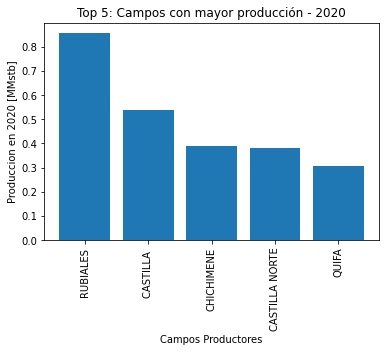

In [13]:
# Grafica - Pregunta 1:
top = 5 # Top 5 - Campos Productores en 2020

query1.index[0:top]
query1['total'].values[0:top]
plt.bar(query1.index[0:top],query1['total'].values[0:top]/1E6)

plt.xticks(query1.index[0:top],fontsize = 10, rotation = 'vertical')
plt.xlabel('Campos Productores')
plt.ylabel('Produccion en 2020 [MMstb]')
plt.title('Top 5: Campos con mayor producción - 2020')
plt.show()

## Pregunta 2

In [14]:
# Ordenar por Departamento
df_2018_2020.loc[(df_2018_2020['año'] == 2018) & (df_2018_2020['departamento'] == 'CASANARE')].groupby('departamento').size().sort_values()

departamento
CASANARE    176
dtype: int64

In [15]:
# Ordenar por Operadora (en Casanare en 2018)
query2 = df_2018_2020.loc[(df_2018_2020['año'] == 2018) & (df_2018_2020['departamento'] == 'CASANARE')].groupby(['operadora']).sum()
query2.head(10)

,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año,total
operadora,,,,,,,,,,,,,,
CANACOL ENERGY COLOMBIA SAS,1821.297419,1800.791429,1797.454516,1781.453000,1602.748387,1881.881333,1927.155161,1604.874516,1732.258667,1732.460000,1672.420333,1641.131613,4036,20995.926375
CARRAO ENERGY S.A. SUCURSAL COLOMIBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,817.672258,814.330000,1498.218710,10090,3130.220968
CEPSA COLOMBIA S.A.,3829.866774,3599.632500,3447.490323,2985.868667,2847.084194,2729.125333,2703.704516,2638.422581,2933.457667,2900.037419,2810.539667,2969.793871,12108,36395.023511
CNE OIL & GAS S.A.S.,969.761935,941.900000,902.657742,920.353000,926.643871,892.061667,858.588387,852.750968,830.629667,0.000000,0.000000,0.000000,8072,8095.347237
COLOMBIA ENERGY DEVELOPMENT CO,2487.438065,2297.326071,2191.791290,1483.352333,2123.798065,2027.165667,1893.378710,1904.803871,2187.688667,2551.361613,2799.912667,2678.974194,12108,26626.991211
DCX S.A.S.,46.142258,43.918214,17.742903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018,107.803376
ECOPETROL S.A.,12526.991613,19431.209643,19496.317742,19723.281333,19461.781613,18864.508667,17267.925806,16683.550000,16393.250333,15418.147419,15152.294333,15275.099032,20180,205694.357535
EMERALD ENERGY PLC SUCURSAL COLOMBIA,1705.910323,1681.853929,1644.380323,1691.979333,1688.565161,1655.403000,1639.130000,1927.631290,1784.643333,1905.207419,2185.711667,2606.286129,8072,22116.701907
EQUION ENERGÍA LIMITED,40972.677419,41270.322500,43064.601935,42741.750000,42264.560000,42409.777000,40064.685806,38799.977419,39575.735667,39428.527742,36390.565000,38524.444194,8072,485507.624683


In [16]:
# Ordenar Operadoras por numero de CAMPOS operados en CASANARE
num_campos = 5 # numero minimo de CAMPOS donde opera
operadoras = df_2018_2020.loc[(df_2018_2020['año'] == 2018) & (df_2018_2020['departamento'] == 'CASANARE')].groupby(['operadora','campo']).sum()
lista_operadoras_ordenadas = operadoras.groupby('operadora').size().sort_values(ascending = False)
top_operadoras = lista_operadoras_ordenadas[lista_operadoras_ordenadas > num_campos]


In [17]:
#Numero de Companias con Produccion en mas de 5 campos en Casanare 
print('Número de Compañías con producción en más de 5 campos en Casanare (año 2018):', top_operadoras.count())
print('\n')
print(top_operadoras)

Número de Compañías con producción en más de 5 campos en Casanare (año 2018): 8


operadora
PERENCO COLOMBIA LIMITED                            34
Frontera Energy Colombia Corp Sucursal Colombia     34
GEOPARK COLOMBIA S.A.S.                             20
ECOPETROL S.A.                                       9
PAREX RESOURCES COLOMBIA LTD. SUCURSAL               7
CEPSA COLOMBIA S.A.                                  6
COLOMBIA ENERGY DEVELOPMENT CO                       6
NEW GRANADA ENERGY CORPORATION SUCURSAL COLOMBIA     6
dtype: int64


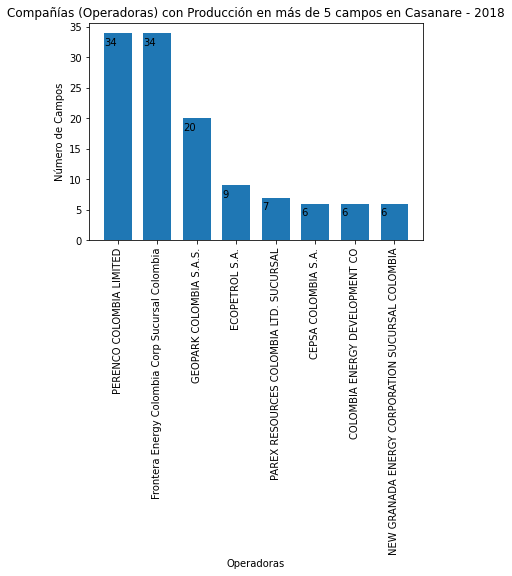

In [18]:
# Grafica - Pregunta 2:
num_campos = 5 # numero minimo de CAMPOS donde opera

x = top_operadoras.index # Companias (Operadoras)
y = top_operadoras.values # Numero de CAMPOS donde Operan

bars = plt.bar(x, height = y, width = 0.7)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in x]
xlabs=[i for i in x]
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval - 2, yval, fontsize = 10)

plt.xticks(top_operadoras.index,fontsize = 10, rotation = 'vertical')
plt.xlabel('Operadoras')
plt.ylabel('Número de Campos')
plt.title('Compañías (Operadoras) con Producción en más de 5 campos en Casanare - 2018')
plt.show()

## Pregunta 3

In [19]:
# Ordenar (de mayor a menor produccion) Contratos 
df_2018_2020.groupby(['contrato','año']).sum().sort_values('total',ascending = False)

ene            feb            mar            abr  \
contrato  año                                                                
CUBARRAL  2019  186325.980000  186564.640000  184219.460000  181078.810000   
          2018  185766.518065  149997.188571  181450.158065  182153.723000   
          2020  190016.390000  186678.360000  189578.950000  176714.530000   
RUBIALES  2018  117480.182903  114457.840714  111204.103548  116217.773667   
          2019  122499.450000  121803.040000  117360.310000  121200.720000   
...                       ...            ...            ...            ...   
CARBONERA 2020       0.330000       0.000000       0.150000       0.000000   
VMM-32    2018       0.000000       0.000000       0.119677       0.318000   
VIM-8     2018       0.000000       0.000000       0.000000       0.000000   
VMM 12    2018       0.000000       0.000000       0.096774       0.000000   
GUASIMO   2020       0.030000       0.000000       0.000000       0.000000   

                          may            jun            jul            ago  \
contrato  año                                                                
CUBARRAL  2019  184989.260000  184165.450000  178716.900000  180062.110000   
          2018  186092.944839  184313.065000  181747.865484  182669.222258   
          2020  174073.790000  180364.170000  182196.030000  181204.480000   
RUBIALES  2018  118495.036129  121107.037333  122102.285161  123535.809032   
          2019  120572.420000  119761.460000  118783.920000  119631.980000   
...                       ...            ...            ...            ...   
CARBONERA 2020       0.000000       0.000000       0.000000       0.000000   
VMM-32    2018       0.000000       0.000000       0.000000       0.000000   
VIM-8     2018       0.000000       0.000000       0.000000       0.000000   
VMM 12    2018       0.000000       0.000000       0.000000       0.000000   
GUASIMO   2020       0.000000       0.000000       0.000000       0.000000   

                          sep            oct            nov            dic  \
contrato  año                                                                
CUBARRAL  2019  178486.560000  184227.090000  183406.050000  185674.780000   
          2018  183440.601667  186277.931290  187203.225667  186076.523226   
          2020       0.000000       0.000000       0.000000       0.000000   
RUBIALES  2018  121785.493000  123125.107742  121541.045333  122560.089355   
          2019  118199.270000  117518.680000  116863.300000  117712.000000   
...                       ...            ...            ...            ...   
CARBONERA 2020       0.000000       0.000000       0.000000       0.000000   
VMM-32    2018       0.000000       0.000000       0.000000       0.000000   
VIM-8     2018       0.000000       0.000000       0.171000       0.100968   
VMM 12    2018       0.000000       0.000000       0.000000       0.000000   
GUASIMO   2020       0.000000       0.000000       0.000000       0.000000   

                       total  
contrato  año                 
CUBARRAL  2019  2.197917e+06  
          2018  2.177189e+06  
          2020  1.460827e+06  
RUBIALES  2018  1.433612e+06  
          2019  1.431907e+06  
...                      ...  
CARBONERA 2020  4.800000e-01  
VMM-32    2018  4.376774e-01  
VIM-8     2018  2.719677e-01  
VMM 12    2018  9.677419e-02  
GUASIMO   2020  3.000000e-02  

[485 rows x 13 columns]

In [20]:
# Pregunta 3
# Ordenar Contratos por Produccion (mayor a menor) en el 2018
query3 = df_2018_2020.loc[df_2018_2020['año'] == 2018].groupby('contrato').sum().sort_values('total',ascending = False)
query3.head()

,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año,total
contrato,,,,,,,,,,,,,,
CUBARRAL,185766.518065,149997.188571,181450.158065,182153.723000,186092.944839,184313.065000,181747.865484,182669.222258,183440.601667,186277.931290,187203.225667,186076.523226,16144,2.177189e+06
RUBIALES,117480.182903,114457.840714,111204.103548,116217.773667,118495.036129,121107.037333,122102.285161,123535.809032,121785.493000,123125.107742,121541.045333,122560.089355,2018,1.433612e+06
LLA 34,54872.550645,56732.130000,56363.467742,58459.654000,60381.571290,57742.528667,58615.512258,63398.025806,63046.249333,62325.132903,66193.425000,67449.333871,30270,7.255796e+05
QUIFA,46456.748710,46946.577500,46798.653871,45783.208667,44679.460968,45881.733667,45618.612581,45156.011935,46516.545333,45967.864516,47208.573667,47424.300000,10090,5.544383e+05
LA CIRA INFANTAS,44607.839032,44440.734643,45416.498387,44467.790333,45672.939032,45872.607000,45864.530000,45824.116774,45144.064667,44907.813548,45291.223667,44904.981935,4036,5.424151e+05


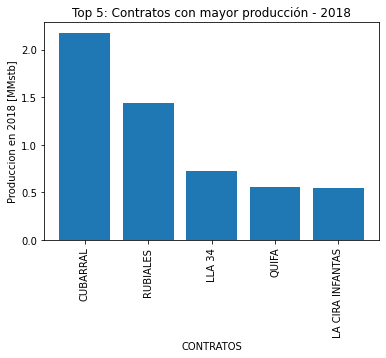

In [21]:
# Grafica - Pregunta 3:
top = 5 # Top 5 - CONTRATOS Productores en 2020

query3.index[0:top]
query3['total'].values[0:top]
plt.bar(query3.index[0:top],query3['total'].values[0:top]/1E6)

plt.xticks(query3.index[0:top],fontsize = 10, rotation = 'vertical')
plt.xlabel('CONTRATOS')
plt.ylabel('Produccion en 2018 [MMstb]')
plt.title('Top 5: Contratos con mayor producción - 2018')
plt.show()

## Pregunta 4

In [22]:
# Ordenar (de mayor a menor produccion) Operadoras  
df_2018_2020.groupby(['operadora','año']).sum().sort_values('total',ascending = False)

ene  \
operadora                                          año                   
ECOPETROL S.A.                                     2019  481671.460000   
                                                   2018  464347.596452   
                                                   2020  490707.300000   
Frontera Energy Colombia Corp Sucursal Colombia    2019   83726.090000   
                                                   2018   78543.022903   
...                                                                ...   
GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA      2019       0.240000   
                                                   2020       0.270000   
LAGOSUR PETROLEUM COLOMBIA INC SUCURSAL COLOMBIA   2018       0.000000   
WATTLE PETROLEUM COMPANY S.A.S                     2020       0.330000   
INGENIERIA CONSTRUCCIONES Y EQUIPOS CONEQUIPOS ... 2018       0.000000   

                                                                   feb  \
operadora                                          año                   
ECOPETROL S.A.                                     2019  480734.780000   
                                                   2018  430787.756429   
                                                   2020  485621.390000   
Frontera Energy Colombia Corp Sucursal Colombia    2019   80548.730000   
                                                   2018   74224.976071   
...                                                                ...   
GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA      2019       0.240000   
                                                   2020       0.250000   
LAGOSUR PETROLEUM COLOMBIA INC SUCURSAL COLOMBIA   2018       0.000000   
WATTLE PETROLEUM COMPANY S.A.S                     2020       0.000000   
INGENIERIA CONSTRUCCIONES Y EQUIPOS CONEQUIPOS ... 2018       0.000000   

                                                                   mar  \
operadora                                          año                   
ECOPETROL S.A.                                     2019  477360.830000   
                                                   2018  462249.681613   
                                                   2020  507815.550000   
Frontera Energy Colombia Corp Sucursal Colombia    2019   78782.250000   
                                                   2018   73763.152581   
...                                                                ...   
GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA      2019       0.230000   
                                                   2020       0.240000   
LAGOSUR PETROLEUM COLOMBIA INC SUCURSAL COLOMBIA   2018       0.000000   
WATTLE PETROLEUM COMPANY S.A.S                     2020       0.150000   
INGENIERIA CONSTRUCCIONES Y EQUIPOS CONEQUIPOS ... 2018       0.096774   

                                                                   abr  \
operadora                                          año                   
ECOPETROL S.A.                                     2019  475783.600000   
                                                   2018  466148.181000   
                                                   2020  476487.170000   
Frontera Energy Colombia Corp Sucursal Colombia    2019   79440.020000   
                                                   2018   75348.751333   
...                                                                ...   
GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA      2019       0.190000   
                                                   2020       0.240000   
LAGOSUR PETROLEUM COLOMBIA INC SUCURSAL COLOMBIA   2018       0.000000   
WATTLE PETROLEUM COMPANY S.A.S                     2020       0.000000   
INGENIERIA CONSTRUCCIONES Y EQUIPOS CONEQUIPOS ... 2018       0.000000   

                                                                   may  \
operadora                                          año                   
ECOPETROL S.A.                                     2019  478635.430

In [24]:
# Pregunta 4
# Ordenar OPERADORAS por Produccion (mayor a menor) en Agosto (2019)
query4 = df_2018_2020.loc[df_2018_2020['año'] == 2019].groupby('operadora').sum().sort_values('ago',ascending = False)
query4.head(10)

,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,año,total
operadora,,,,,,,,,,,,,,
ECOPETROL S.A.,481671.46,480734.78,477360.83,475783.60,478635.430,481050.470000,474514.550000,473986.41,473069.96,477012.18,477142.97,484942.87,207957,5.735906e+06
Frontera Energy Colombia Corp Sucursal Colombia,83726.09,80548.73,78782.25,79440.02,81574.907,82145.270000,81130.730000,81441.68,82217.07,80259.73,77277.92,74556.95,135273,9.631013e+05
GEOPARK COLOMBIA S.A.S.,69556.26,70507.35,68868.42,69504.88,70330.970,69501.600000,68808.120000,69154.42,69843.27,71616.02,75277.20,72374.58,42399,8.453431e+05
OCCIDENTAL DE COLOMBIA LLC,50030.59,51590.57,53337.52,53115.22,51853.030,53934.590000,39469.300000,53299.12,49685.09,53165.87,51989.52,51804.71,48456,6.132751e+05
EQUION ENERGÍA LIMITED,37703.30,36862.04,35868.56,36853.10,36595.380,35829.580000,35292.660000,34950.01,33743.54,32515.64,32497.80,31629.80,8076,4.203414e+05
GRAN TIERRA ENERGY COLOMBIA LTD,37088.22,34993.68,35010.60,34207.87,32351.940,29186.060000,29425.530000,29555.20,29012.87,27957.97,28976.65,29819.32,44418,3.775859e+05
MANSAROVAR ENERGY COLOMBIA LTD,26400.20,26530.53,25323.63,25707.48,25702.310,25063.480000,24710.600000,25256.75,24735.26,24495.25,24006.49,23727.96,16152,3.016599e+05
HOCOL S.A.,19638.88,19245.12,19451.91,19465.08,19455.680,19594.016667,19356.220000,19614.02,19835.04,19293.50,19555.71,19972.40,54513,2.344776e+05
PAREX RESOURCES COLOMBIA LTD. SUCURSAL,12164.51,12989.61,11938.79,13588.40,14091.500,14953.612000,14852.284194,15727.97,17280.86,17094.74,15312.68,13666.18,32304,1.736611e+05


In [25]:
print('Top 10 Operadoras con más alta producción en Agosto - 2019:')
print('\n')
query4.head(10)['ago']

Top 10 Operadoras con más alta producción en Agosto - 2019:




operadora
ECOPETROL S.A.                                     473986.41
Frontera Energy Colombia Corp Sucursal Colombia     81441.68
GEOPARK COLOMBIA S.A.S.                             69154.42
OCCIDENTAL DE COLOMBIA LLC                          53299.12
EQUION ENERGÍA LIMITED                              34950.01
GRAN TIERRA ENERGY COLOMBIA LTD                     29555.20
MANSAROVAR ENERGY COLOMBIA LTD                      25256.75
HOCOL S.A.                                          19614.02
PAREX RESOURCES COLOMBIA LTD. SUCURSAL              15727.97
CEPSA COLOMBIA S.A.                                 12702.09
Name: ago, dtype: float64

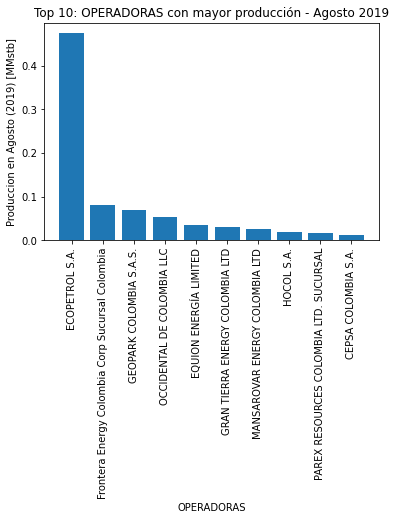

In [26]:
# Grafica - Pregunta 4:
top = 10 # Top 10 - OPERADORAS por produccion en Agosto, 2019

query4.index[0:top]
query4['ago'].values[0:top]

plt.bar(query4.index[0:top],query4['ago'].values[0:top]/1E6)

plt.xticks(query4.index[0:top],fontsize = 10, rotation = 'vertical')
plt.xlabel('OPERADORAS')
plt.ylabel('Produccion en Agosto (2019) [MMstb]')
plt.title('Top 10: OPERADORAS con mayor producción - Agosto 2019')
plt.show()

## Pregunta 5

In [27]:
# Ordenar Produccion TOTAL por Año
df_2018_2020_total = df_2018_2020.groupby('año').sum()

# Calcular Produccion por Trimestres para cada año
df_2018_2020_total['trimestre 1'] = df_2018_2020_total[['ene','feb','mar']].sum(axis = 1)
df_2018_2020_total['trimestre 2'] = df_2018_2020_total[['abr','may','jun']].sum(axis = 1)
df_2018_2020_total['trimestre 3'] = df_2018_2020_total[['jul','ago','sep']].sum(axis = 1)
df_2018_2020_total['trimestre 4'] = df_2018_2020_total[['oct','nov','dic']].sum(axis = 1)

df_2018_2020_total #Data frame con produccion por año

,ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic,total,trimestre 1,trimestre 2,trimestre 3,trimestre 4
año,,,,,,,,,,,,,,,,,
2018,860876.706452,823330.482857,856495.436452,864751.454,865993.811935,863745.850333,860402.208710,866480.303871,868708.629667,878854.612903,883263.161,889388.289997,1.038229e+07,2.540703e+06,2.594491e+06,2.595591e+06,2.651506e+06
2019,898972.850000,892689.440000,884876.140000,891011.430,894518.577000,892187.441333,868749.884194,882863.580000,879497.420000,882748.790000,880270.800,882222.310000,1.063061e+07,2.676538e+06,2.677717e+06,2.631111e+06,2.645242e+06
2020,883914.570000,878389.300000,857112.840000,796163.990,732276.150000,729905.140000,734986.590000,742090.710000,0.000000,0.000000,0.000,0.000000,6.354839e+06,2.619417e+06,2.258345e+06,1.477077e+06,0.000000e+00


In [28]:
# Resultado: Pregunta 5
# Produccion de T1 y T2 (2019 y 2020)
query5 = df_2018_2020_total.iloc[1:3,13:-2].T
query5

año,2019,2020
trimestre 1,2.676538e+06,2619416.71
trimestre 2,2.677717e+06,2258345.28


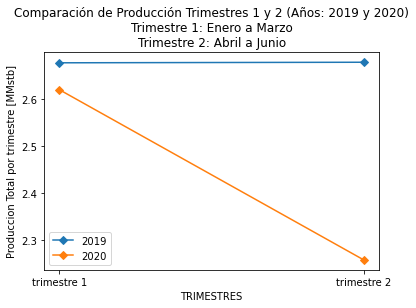

In [29]:
# Grafica: Pregunta 5

x = query5.index
y19 = query5[2019]/1e6
y20 = query5[2020]/1e6
plt.plot(y19,marker = 'D', label = '2019')
plt.plot(y20,marker = 'D', label = '2020')
plt.xticks(x)
plt.legend()
plt.xlabel('TRIMESTRES')
plt.ylabel('Produccion Total por trimestre [MMstb]')
plt.title('Comparación de Producción Trimestres 1 y 2 (Años: 2019 y 2020)\nTrimestre 1: Enero a Marzo\nTrimestre 2: Abril a Junio')
plt.show()